<a href="https://colab.research.google.com/github/khalid-data-aspirant42/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bike Sharing Demand
Goal: To predict the future demands for rental bikes in cities

In [1]:
# importing essential modules for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# importing the dataframe
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Bike_Sharing_Demand_Prediction/SeoulBikeData.csv', encoding='latin-1')

In [7]:
# Getting details of dataframe
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df1.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
df1.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
df_columns = df1.iloc[:, 2:-3]
percent_missing = df_columns.isnull().sum() * 100 / len(df_columns)
percent_missing =  pd.DataFrame({'years': df_columns.columns,
                                 'percent_missing': percent_missing})

percent_missing.T

# Note: no null values found

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
years,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Finding relation between dependent and independent variable columns
df1.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


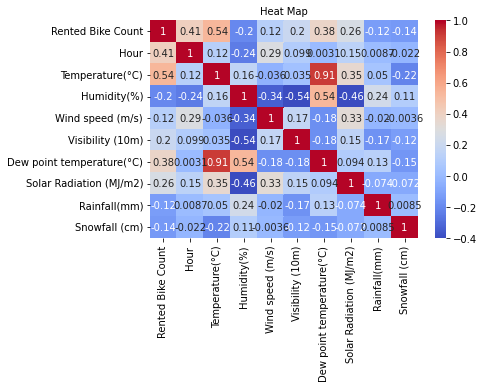

In [17]:
# Correlation heatmap
sns.heatmap(df1.corr(), vmin=-0.4, cmap='coolwarm', annot=True)
plt.title('Heat Map', fontsize=10)
plt.show()


In [18]:
# Extracting essential columns
col_list = []
for e in list(df1.columns):
    col_list.append(e)
list2 = ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day']
for e in list2:
    col_list.remove(e)    
print(col_list)

['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [19]:
# Extracting particular dates
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df_dec_17 = df1.loc[(df1['Date']>='01/12/2017') & (df1['Date']<'01/02/2018')]
df_dec_17

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2018-01-01,125,19,-0.1,39,1.3,1911,-12.4,0.0,0.0,0.0,Winter,Holiday,Yes
764,2018-01-01,206,20,-0.3,40,1.2,1936,-12.2,0.0,0.0,0.0,Winter,Holiday,Yes
765,2018-01-01,203,21,-0.9,44,1.2,1871,-11.6,0.0,0.0,0.0,Winter,Holiday,Yes
766,2018-01-01,168,22,-1.3,48,0.8,1927,-10.9,0.0,0.0,0.0,Winter,Holiday,Yes


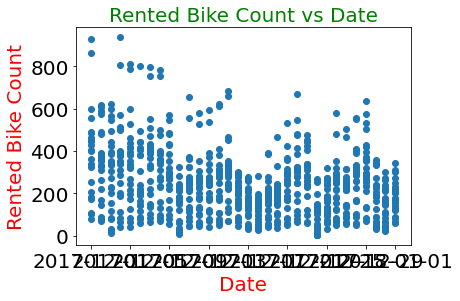

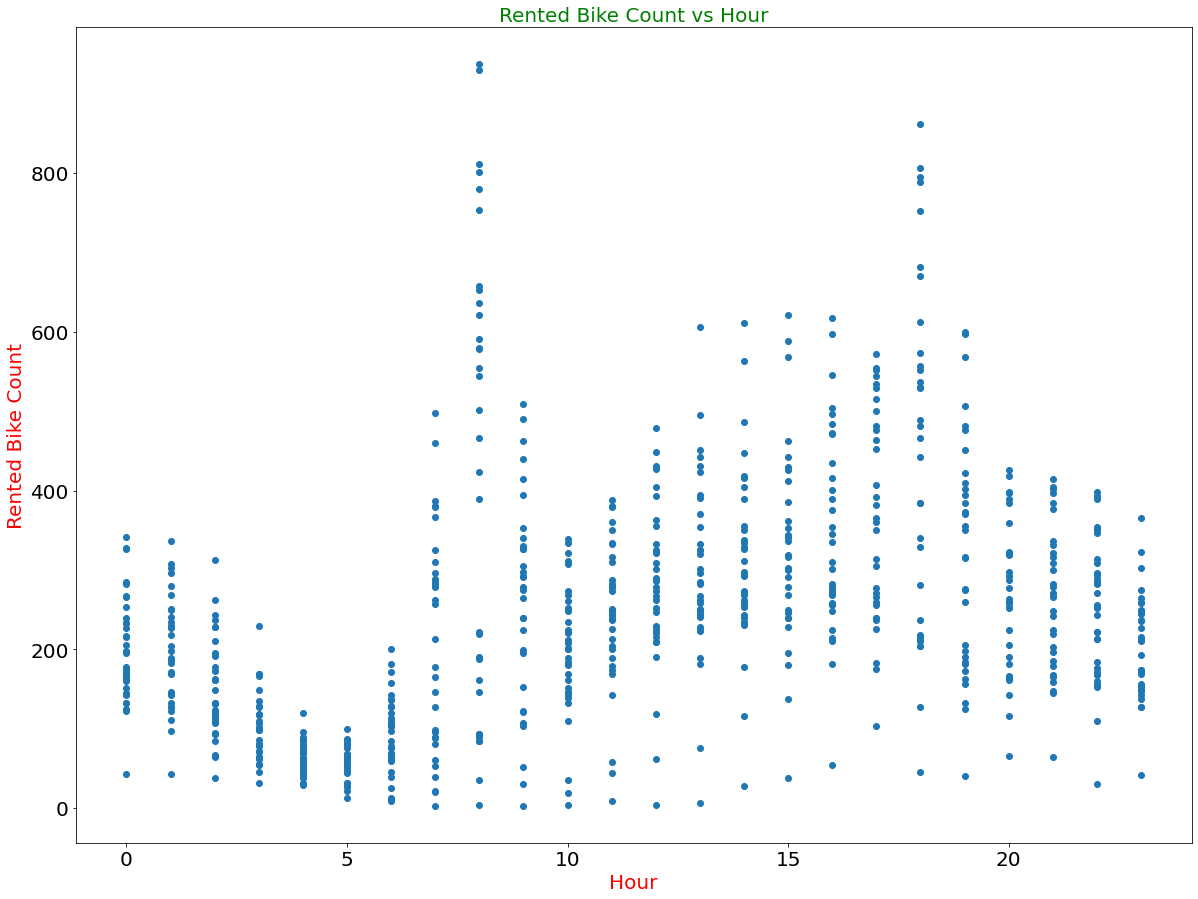

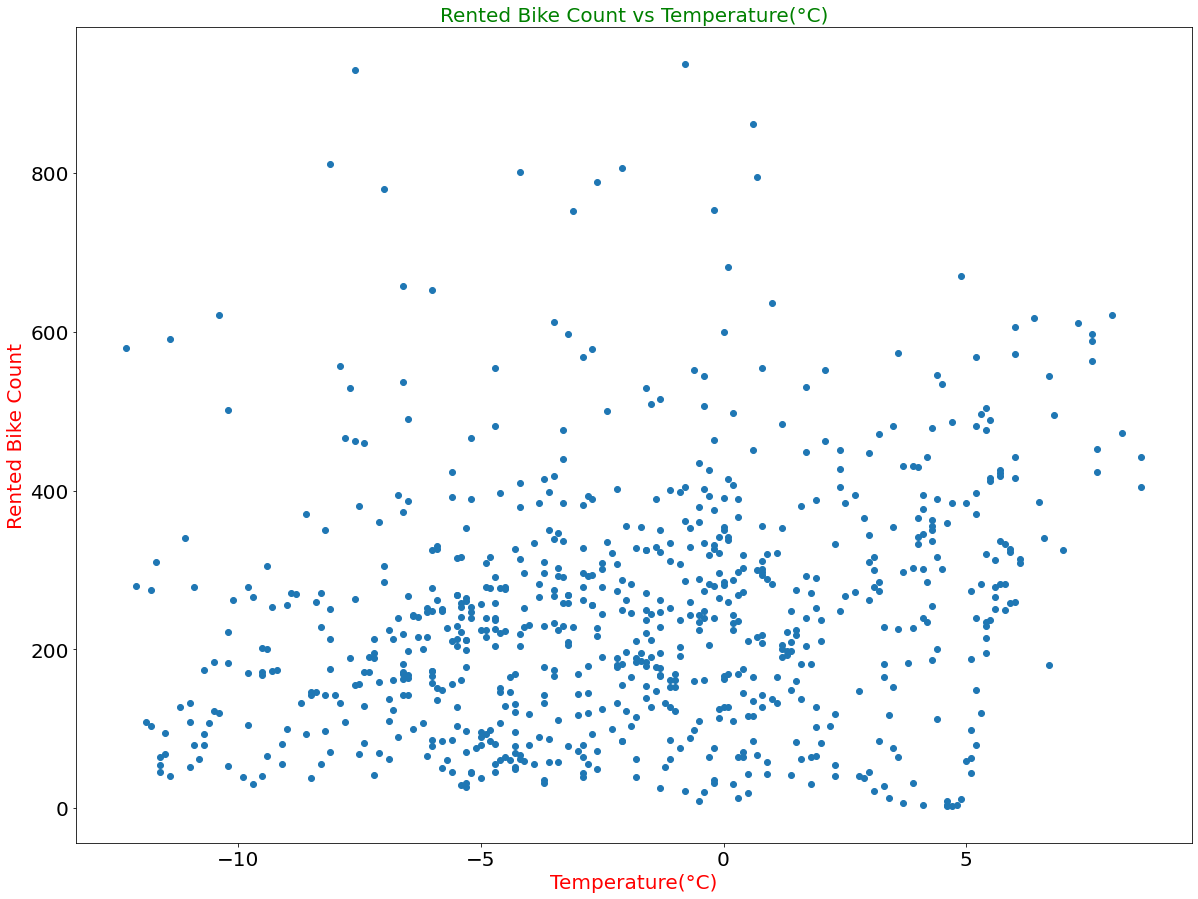

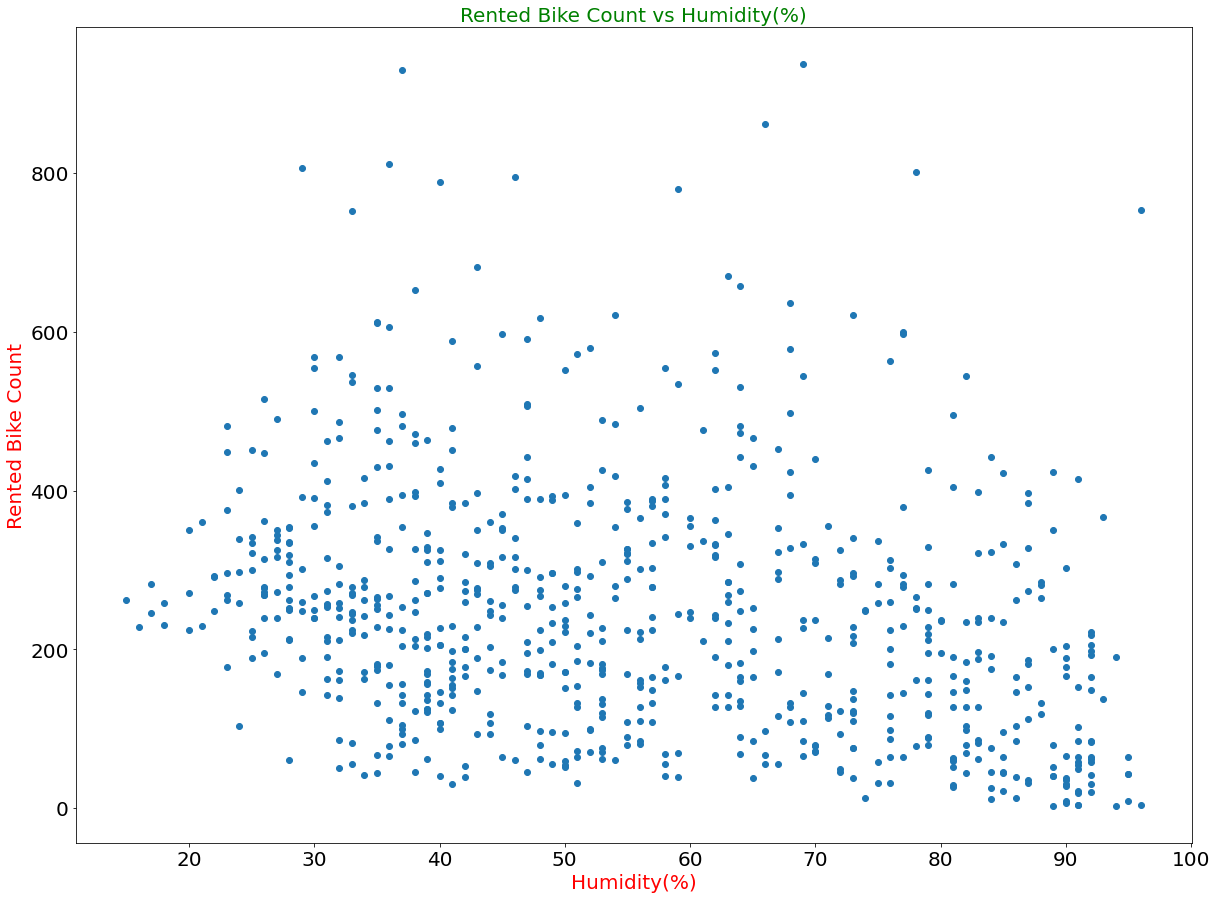

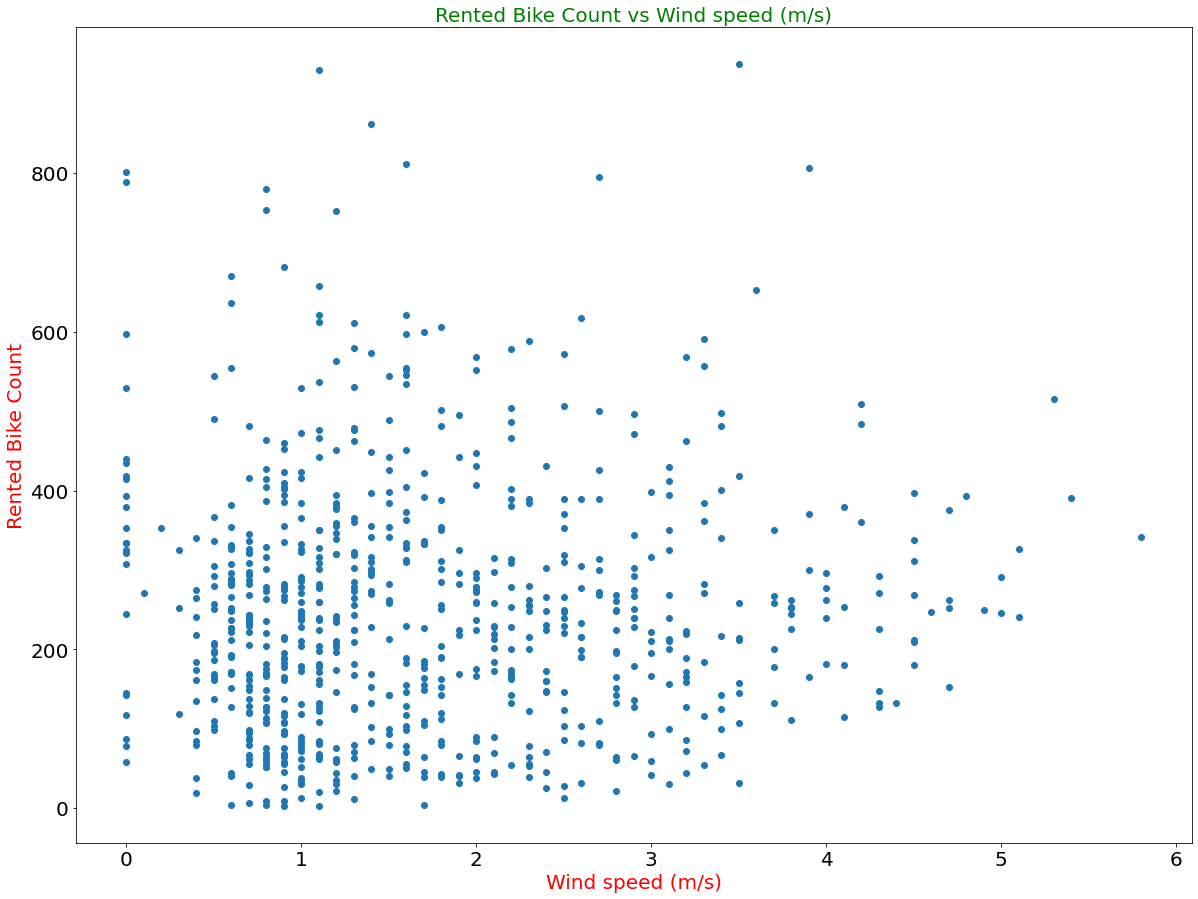

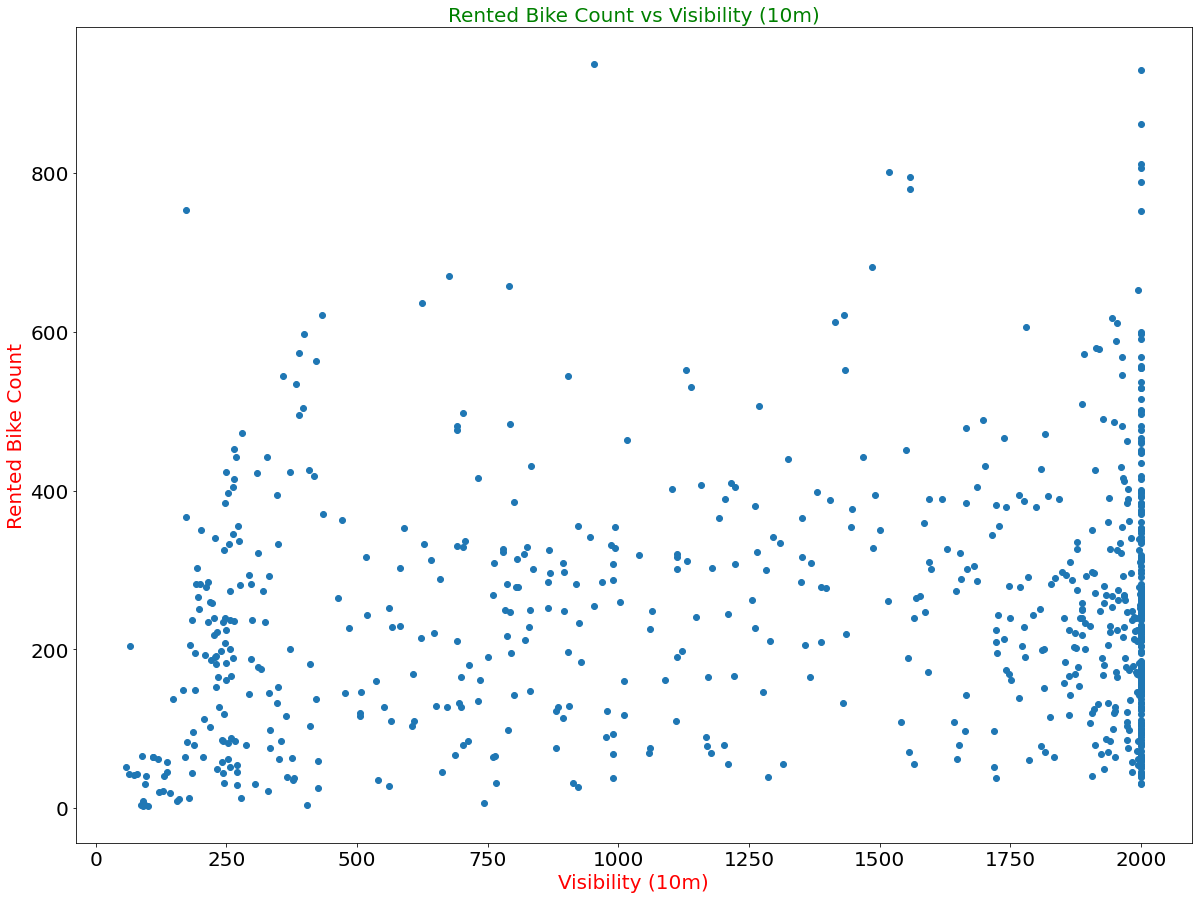

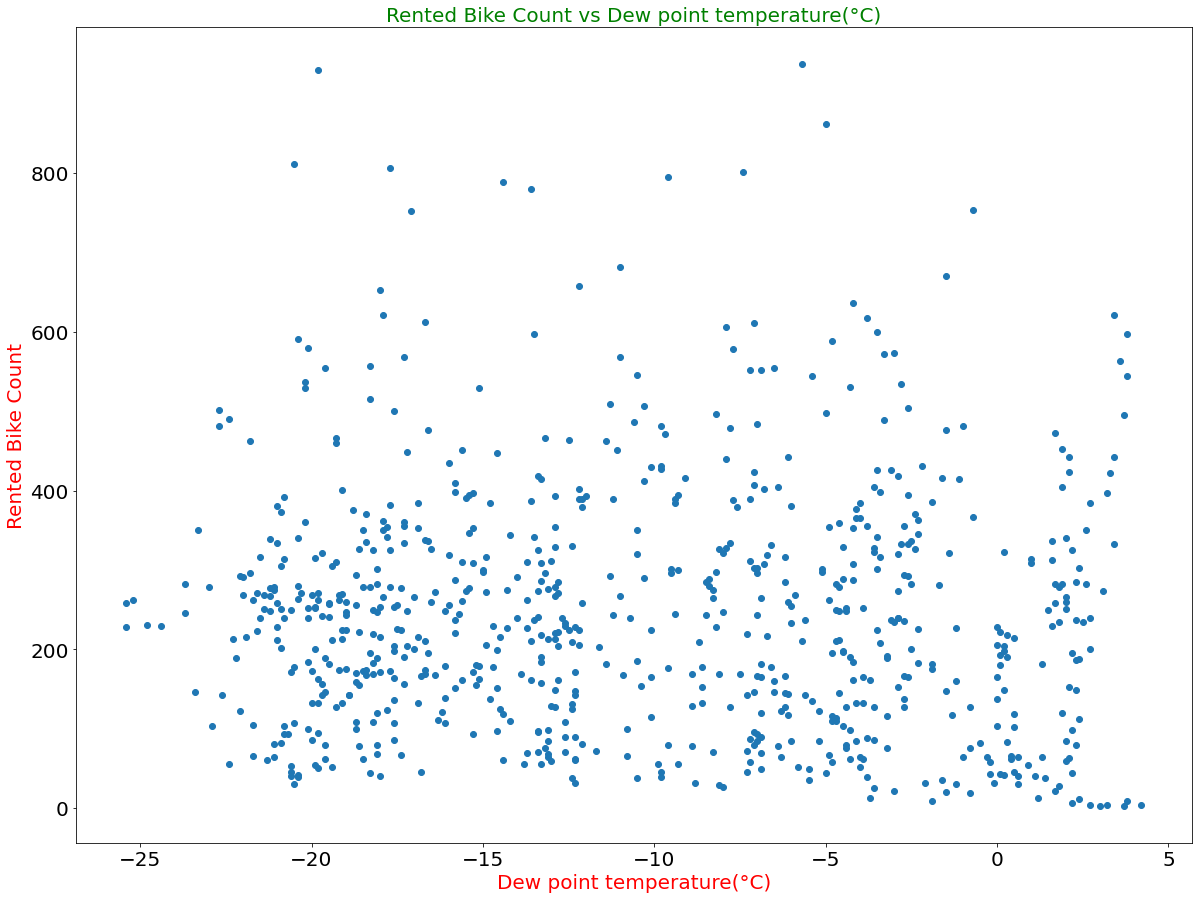

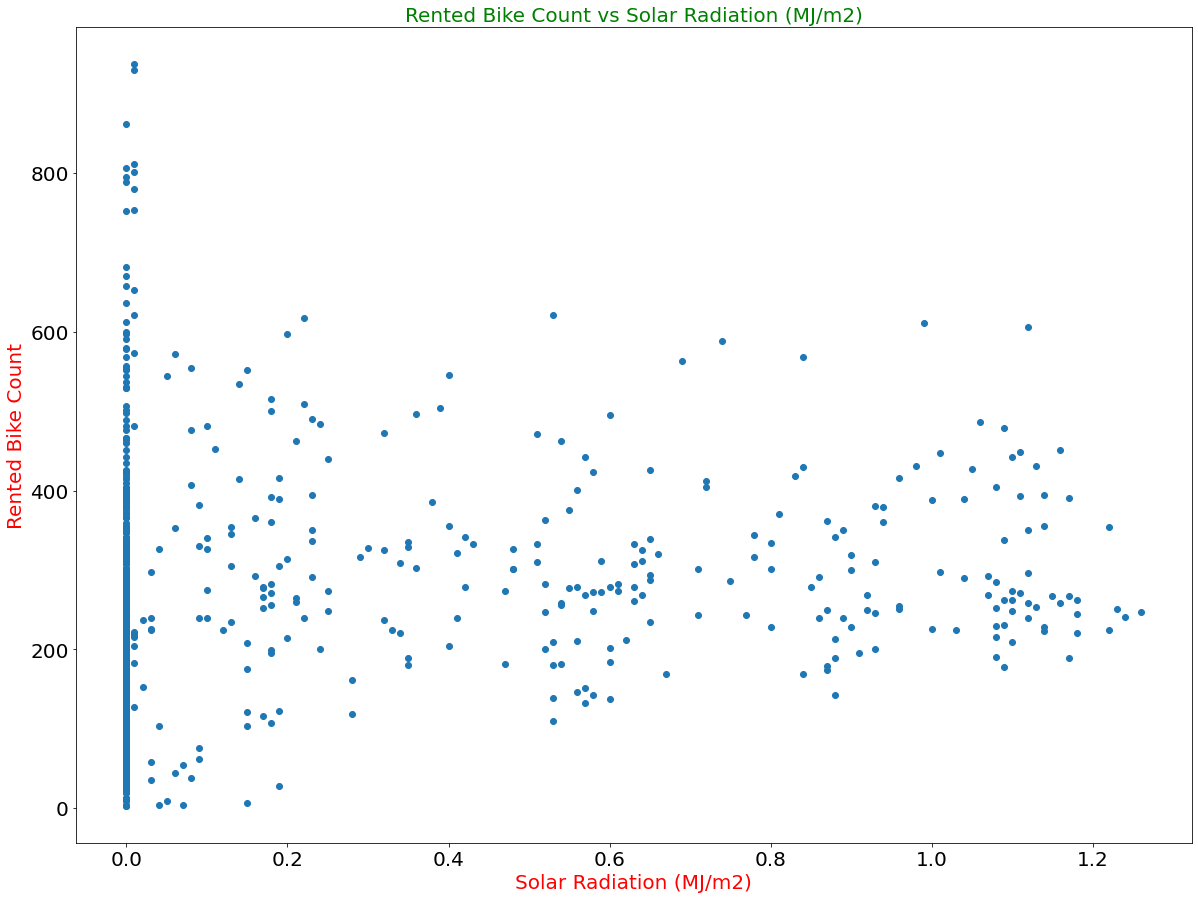

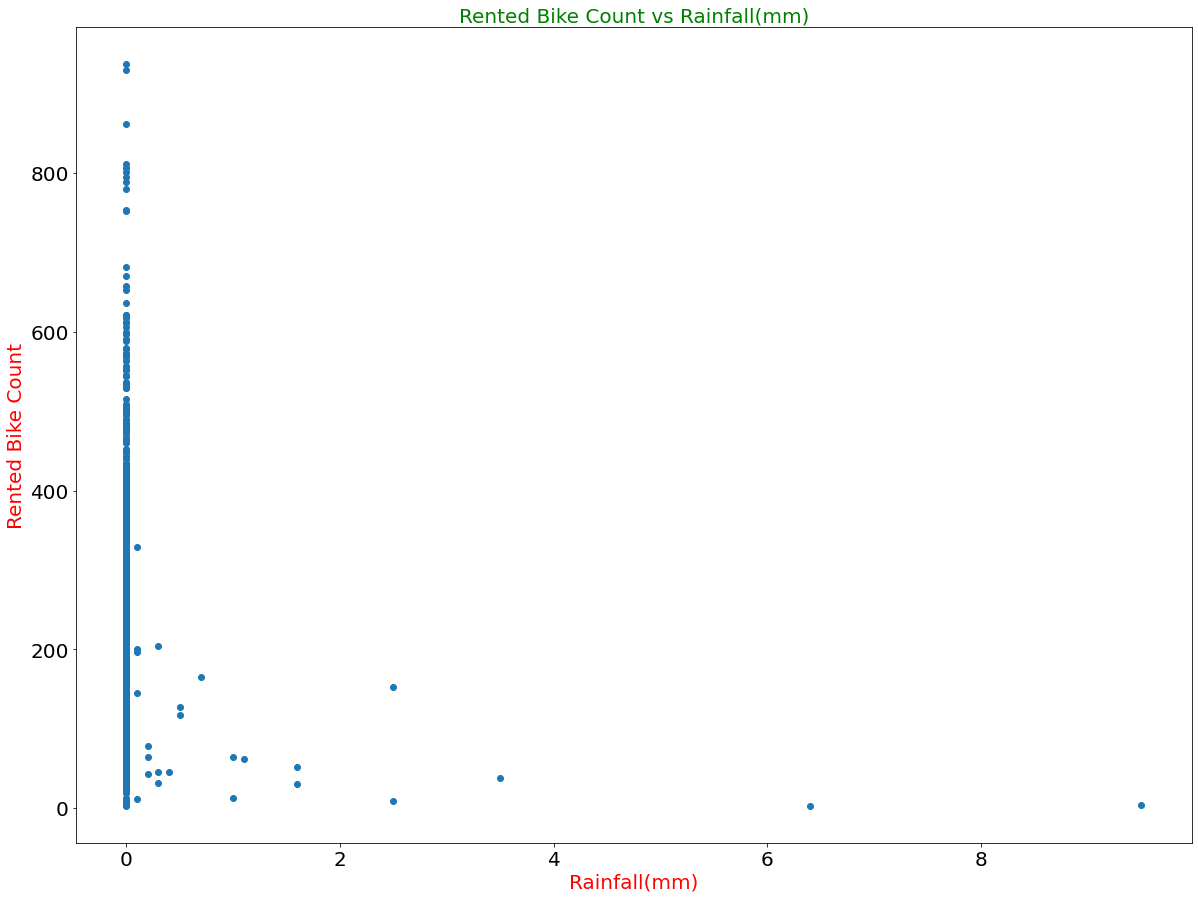

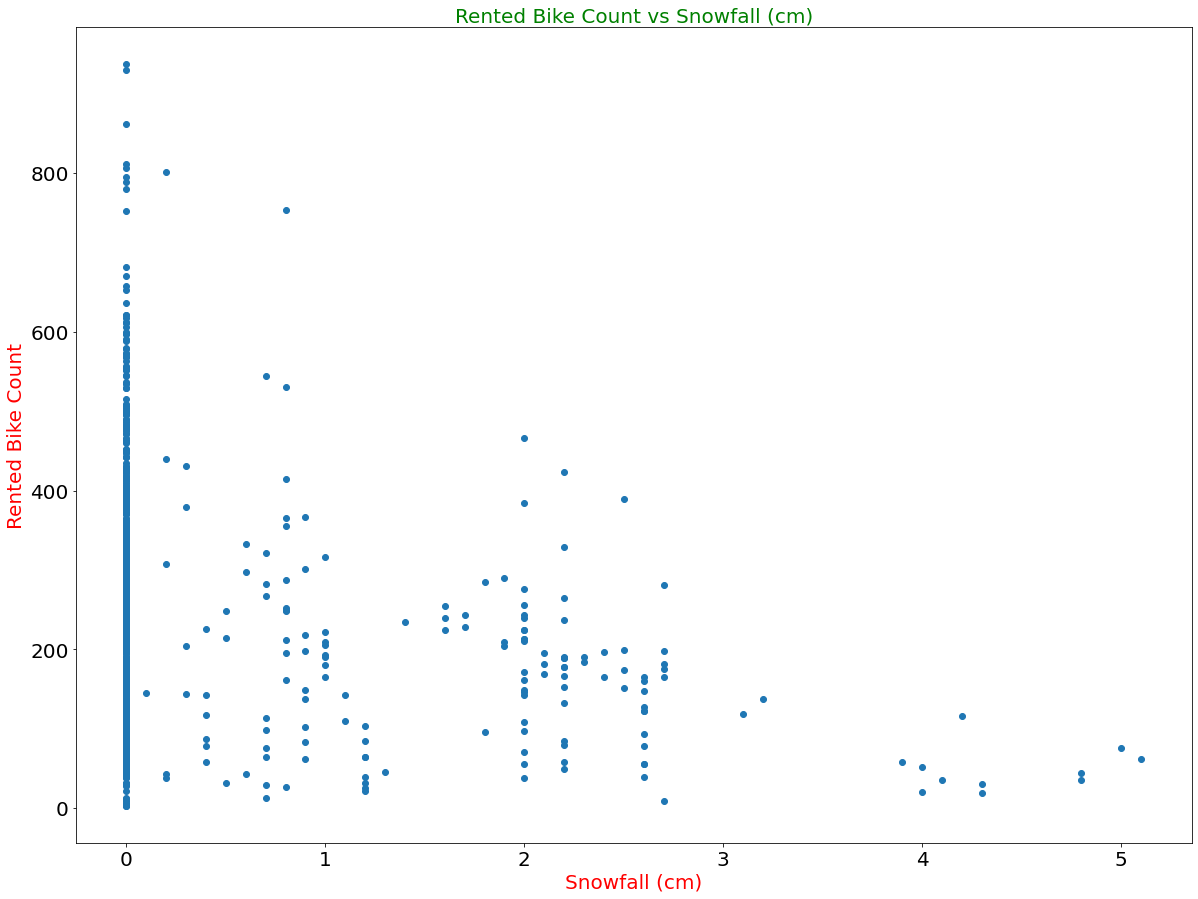

In [20]:
# Ploting scatter graph  for dependent and independent variables
for elem in col_list:
    x = df_dec_17[elem]
    y = df_dec_17['Rented Bike Count']
    plt.scatter(x,y)
    plt.title(f'Rented Bike Count vs {elem}', fontsize=20, color='green')
    plt.ylabel('Rented Bike Count', fontsize=20, color='red')
    plt.xlabel(elem, fontsize=20, color='red')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (20, 15)
    plt.show()

In [21]:
# importing modules for prediction
from sklearn import linear_model

['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


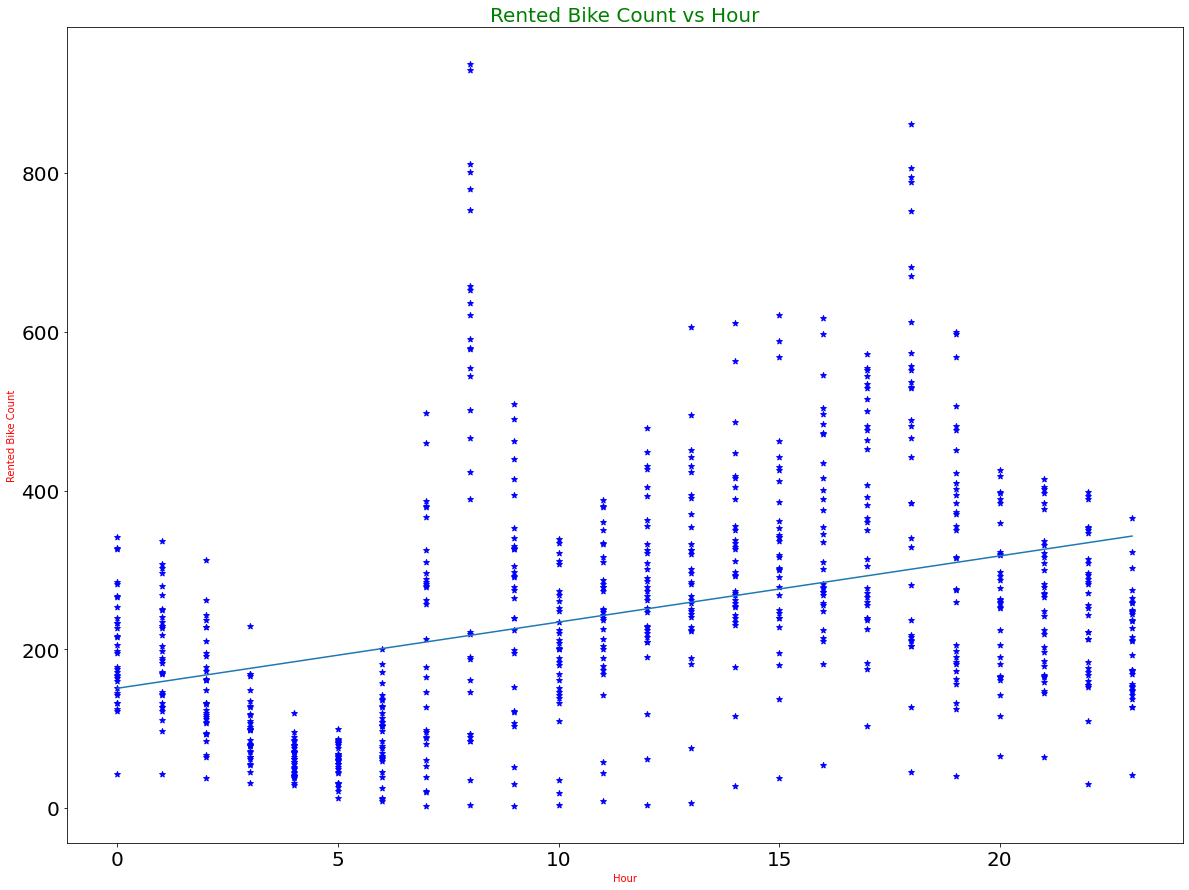

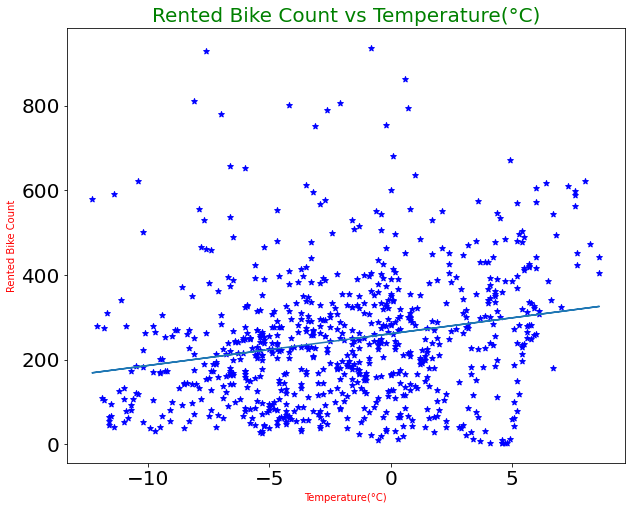

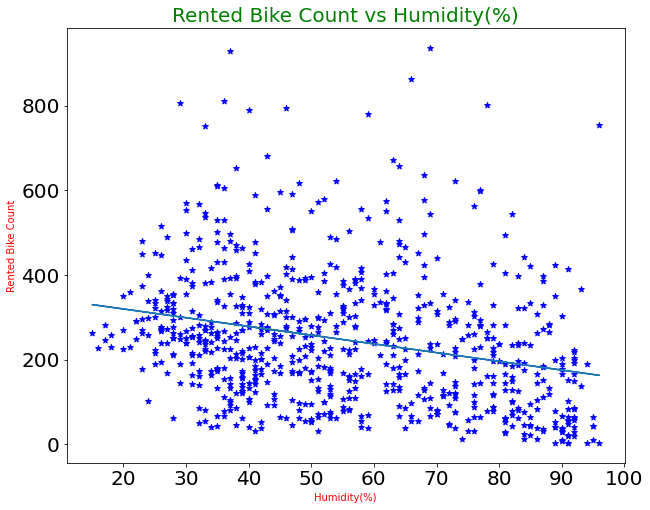

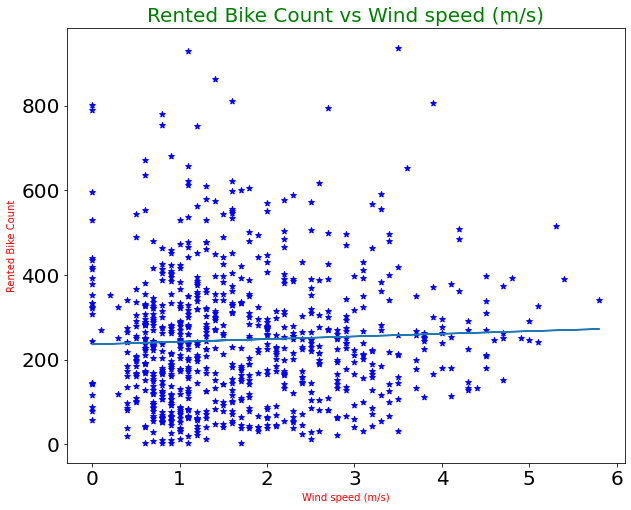

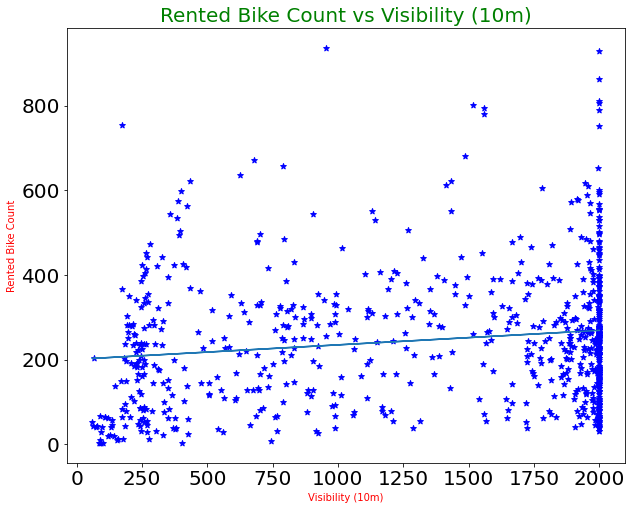

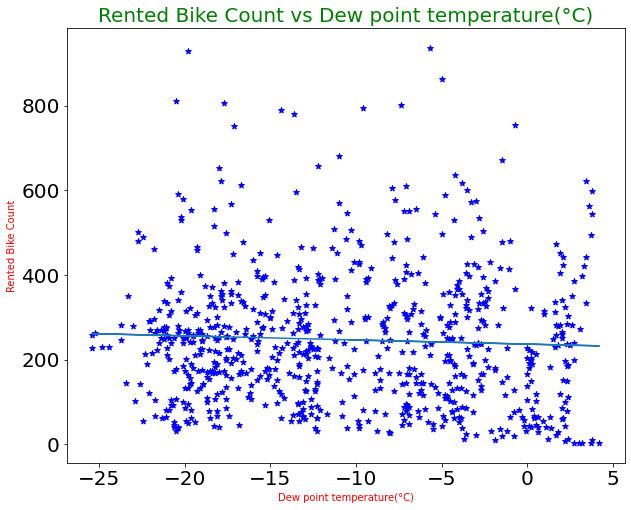

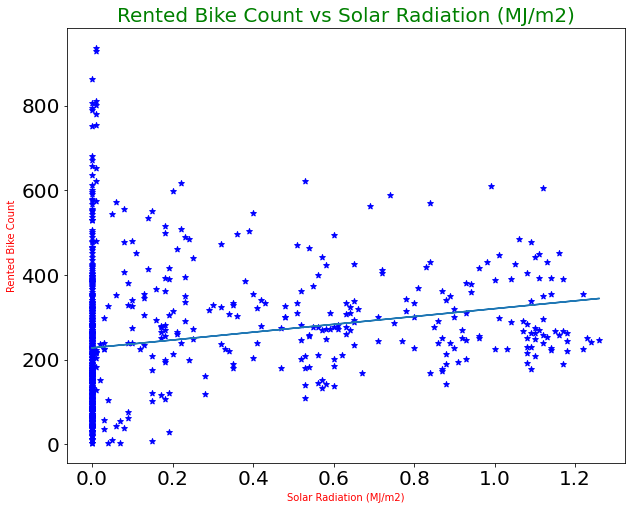

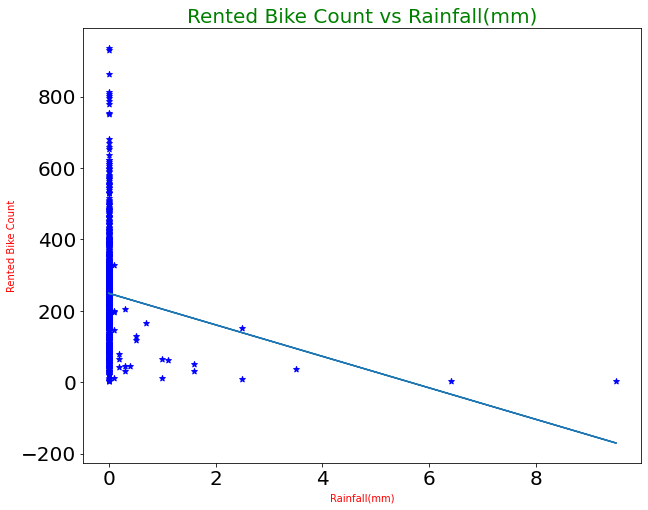

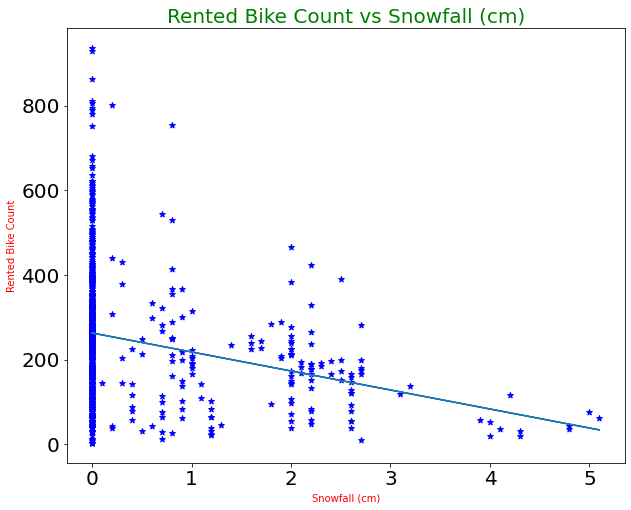

In [22]:
# Extracting essential columns
col_list = []
for e in list(df1.columns):
    col_list.append(e)
list2 = ['Date','Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day']
for e in list2:
    col_list.remove(e)    
print(col_list)

for elem in col_list:
    y = df_dec_17['Rented Bike Count']
    reg = linear_model.LinearRegression()
    reg.fit(df_dec_17[[elem]],y)
    plt.title(f'Rented Bike Count vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Rented Bike Count', color='red')
    plt.scatter(df_dec_17[elem],y, color='blue', marker='*')
    plt.plot(df_dec_17[elem], reg.predict(df_dec_17[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.show()

In [25]:
reg = linear_model.LinearRegression()
reg.fit(df_dec_17[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']],df_dec_17['Rented Bike Count'])

LinearRegression()

In [26]:
reg.coef_

array([ 5.78049911e+00,  9.76099976e+00, -1.73999572e+00, -1.69160524e+01,
        1.67769760e-02,  1.87519627e+01, -3.36726245e+01, -2.57644842e+01])

In [27]:
reg.intercept_

308.8255950740007

In [28]:
# Let's predict
reg.predict([[1,-3.3,41,0.7,2000,0.00,0.0,0.0]])  
# 232.76  # predicted value
# 230     # Actual value

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([232.76768554])

In [29]:
df1[df1['Date']=='2018-01-01']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
744,2018-01-01,206,0,-3.2,40,0.5,1358,-14.9,0.00,0.0,0.0,Winter,Holiday,Yes
745,2018-01-01,230,1,-3.3,41,0.7,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes
746,2018-01-01,178,2,-3.7,42,0.9,2000,-14.7,0.00,0.0,0.0,Winter,Holiday,Yes
747,2018-01-01,119,3,-4.0,44,1.0,2000,-14.4,0.00,0.0,0.0,Winter,Holiday,Yes
748,2018-01-01,62,4,-4.2,53,1.1,1994,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
749,2018-01-01,61,5,-4.4,54,0.8,1786,-12.3,0.00,0.0,0.0,Winter,Holiday,Yes
750,2018-01-01,65,6,-4.5,51,1.1,2000,-13.1,0.00,0.0,0.0,Winter,Holiday,Yes
751,2018-01-01,81,7,-4.7,56,1.1,2000,-12.1,0.00,0.0,0.0,Winter,Holiday,Yes
752,2018-01-01,89,8,-5.0,55,1.0,2000,-12.6,0.00,0.0,0.0,Winter,Holiday,Yes
753,2018-01-01,121,9,-4.3,39,0.7,1973,-16.2,0.15,0.0,0.0,Winter,Holiday,Yes


In [30]:
# Now let's predict with train test data of complete dataframe

x = df1.drop(columns=['Date','Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day'])
x
y = df1['Rented Bike Count']
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
model.predict(x_test)

array([ 598.16602719,  262.80316483,  528.96826147, ...,  173.68888726,
       -228.94057198,  857.61007222])

In [33]:
model.score(x_test,y_test)

0.46455702768741514

In [34]:
model.predict([[1,-3.3,41,0.7,2000,-14.7,0.00,0.0,0.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([92.04688658])